# Exploring Dandiset 001361: Hippocampal Population Code for Experience Relative to Reward

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 001361, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data were collected by Sosa, Plitt, & Giocomo and are related to the paper "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

We will cover the following:
1.  Loading the Dandiset and listing its assets.
2.  Loading an NWB file and examining its metadata.
3.  Visualizing position and lick data.
4.  Exploring the relationship between position and lick activity.

Required packages:
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

Found 152 assets in the dataset

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb


Now, let's load one of the NWB files and examine its contents. We will load the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
#Using remfile to load data from remote source
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb.session_description # (str) processed suite2p data

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


'processed suite2p data'

Now let's visualize the position data from the NWB file.

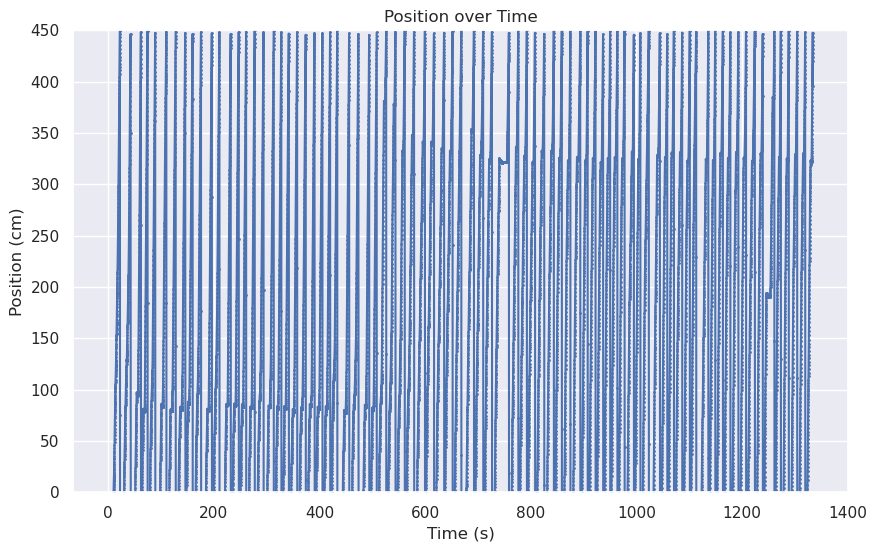

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Extract position data and timestamps
position_ts = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series
position_data = position_ts.get('position').data[:]
position_timestamps = position_ts.get('position').timestamps[:]

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(position_timestamps, position_data, marker='.', linestyle='-', markersize=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Position over Time")
plt.ylim([0, 450])  # Adjust y-axis to focus on relevant position range
plt.grid(True)
plt.show()

Now let's visualize the lick data from the NWB file.

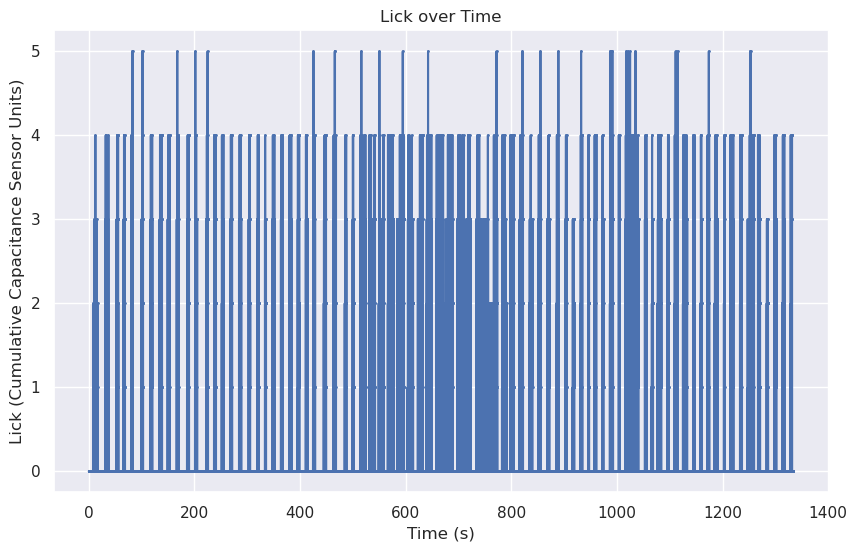

In [4]:
# Extract lick data and timestamps
position_ts = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series
lick_data = position_ts.get('lick').data[:]
lick_timestamps = position_ts.get('lick').timestamps[:]

# Plot the lick data
plt.figure(figsize=(10, 6))
plt.plot(lick_timestamps, lick_data, marker='.', linestyle='-', markersize=2)
plt.xlabel("Time (s)")
plt.ylabel("Lick (Cumulative Capacitance Sensor Units)")
plt.title("Lick over Time")
plt.grid(True)
plt.show()

Finally, let's explore the relationship between position and lick activity.

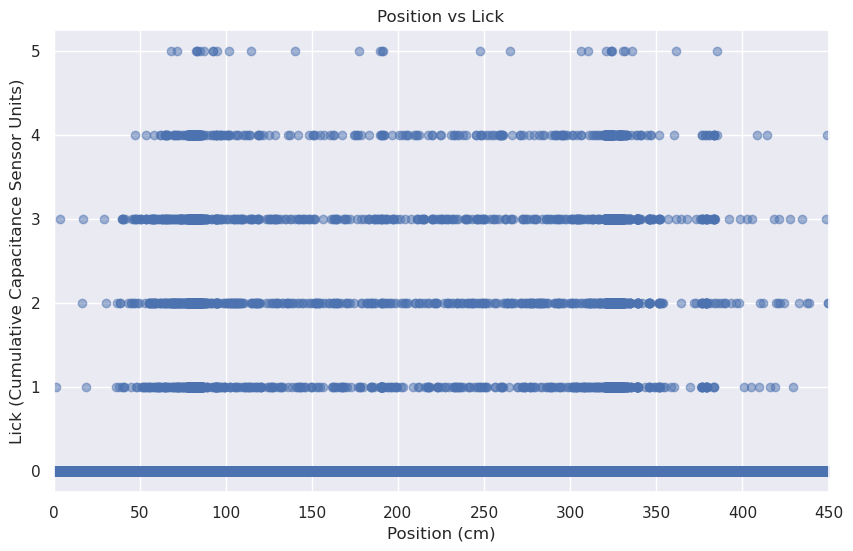

In [5]:
# Ensure both datasets have the same timestamps
min_length = min(len(position_data), len(lick_data))
position_data = position_data[:min_length]
lick_data = lick_data[:min_length]
position_timestamps = position_timestamps[:min_length]
lick_timestamps = lick_timestamps[:min_length]

# Find indices where position is greater than 0
valid_indices = np.where(position_data > 0)[0]

# Filter both position and lick data using the valid indices
position_data = position_data[valid_indices]
lick_data = lick_data[valid_indices]

# Plot position vs lick
plt.figure(figsize=(10, 6))
plt.scatter(position_data, lick_data, alpha=0.5)
plt.xlabel("Position (cm)")
plt.ylabel("Lick (Cumulative Capacitance Sensor Units)")
plt.title("Position vs Lick")
plt.xlim([0, 450])
plt.grid(True)
plt.show()

## Summary

This notebook explored the Dandiset 001361, focusing on the NWB file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`. We visualized position and lick data, and investigated the relationship between them. The analysis revealed that licking activity appears to occur preferentially at certain positions. 

Future directions for analysis could include:
*   Analyzing the neural activity in relation to position and licking behavior.
*   Exploring other NWB files in the Dandiset to see if the observed patterns are consistent across sessions and subjects.